# Player History and Matchup History EDU

Now that we created data for player history and matchup history. Let's do some exploratory data analysis so we understand our data before using it

We will use the diff + history/matchup dataset since it has less columns and loads faster

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
import re
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper

%matplotlib inline
sns.set()



# update this
FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features-diff-matchup5.csv'

START_YEAR = 1998
END_YEAR = 2019



# Let's load our data from 1998 on

In [9]:
data = pd.read_csv(FEATURE_FILE)
data = data[data.tourney_year >= START_YEAR]
data.shape

(59293, 50)

In [10]:
[col for col in data.columns if re.search(r"(p1|p2)_[a-z_]+", col)]

['p1_hand',
 'p1_ioc',
 'p1_winner',
 'p2_hand',
 'p2_ioc',
 'p1_history_games_lost',
 'p1_history_games_won',
 'p1_history_games_won_percentage',
 'p1_losses',
 'p1_matchup_games',
 'p1_matchup_games_won_percentage',
 'p1_matchup_losses',
 'p1_matchup_sets',
 'p1_matchup_sets_won_percentage',
 'p1_matchup_win_percentage',
 'p1_matchup_wins',
 'p1_history_sets_lost',
 'p1_history_sets_won',
 'p1_history_sets_won_percentage',
 'p1_history_win_percentage',
 'p1_history_wins',
 'p2_history_games_lost',
 'p2_history_games_won',
 'p2_history_games_won_percentage',
 'p2_history_losses',
 'p2_matchup_games',
 'p2_matchup_games_won_percentage',
 'p2_matchup_losses',
 'p2_matchup_sets',
 'p2_matchup_sets_won_percentage',
 'p2_matchup_win_percentage',
 'p2_matchup_wins',
 'p2_history_sets_lost',
 'p2_history_sets_won',
 'p2_history_sets_won_percentage',
 'p2_win_percentage',
 'p2_wins']

# Let's look at how many players have a total of 5 matches leading up to our match

Looks like almost all players at 5 matches coming into our match

(118586,)


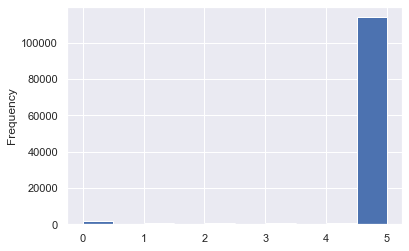

In [14]:
data_orig = data.copy()
data["p1_matches"] = data["p1_history_wins"] + data["p1_losses"]
data["p2_matches"] = data["p2_wins"] + data["p2_history_losses"]
matches = data["p1_matches"].append(data["p2_matches"])
print(matches.shape)
matches.plot(kind='hist')

## Only 37.4 % of players come into a match with a winning record

Doesn't look like we have enough data to fill in the entire histogram, but it's probably close to normally distributed

False    74229
True     44357
dtype: int64

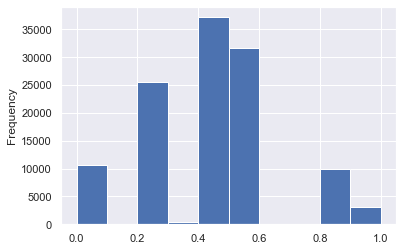

In [24]:
match_percentage = data["p1_history_win_percentage"].append(data["p2_win_percentage"])
matches_num = match_percentage.shape[0]
match_percentage.plot(kind='hist')

winning_record = match_percentage > 0.5
winning_record.value_counts()

## 75% of players come into a match with 3 or less wins. Only 25% of player come into a match winning 4 or 5 out of matches coming into a match

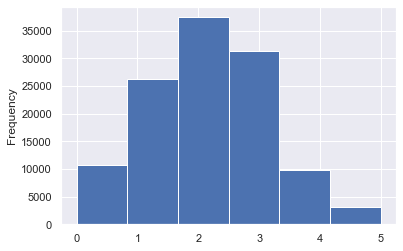

In [27]:
wins = data["p1_history_wins"].append(data["p2_wins"])
wins.plot(kind='hist', bins=6)

In [28]:
np.quantile(wins, [0.25, 0.5, 0.75])

array([1., 2., 3.])

# Match-Ups